### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

### Training data

In [2]:
df = pd.read_csv(r"data\1_homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Plotting training data

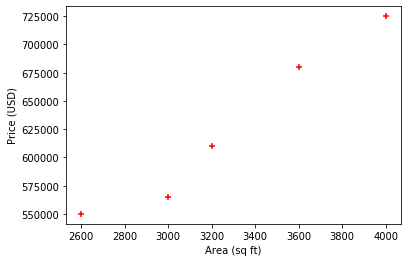

In [3]:
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (USD)')
plt.scatter(df['area'], df['price'], color='red', marker='+')

# Linear Regression
We are now initializint the linear model and fitting the data to the model.

__Remember__: the first parameter of the `fit` model's method expects a 2D array, so we must write `df[['col']]` __not__ `df['col']`

In [4]:
# Initializint model
model = linear_model.LinearRegression()
# Fitting data to model
model.fit(df[['area']], df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Prediction
Like before the `predict` method also expects a 2d array (column vector), so we pass in `[[number]]` to make a 2d array with a single value

In [5]:
model.predict([[3300]])

array([628715.75342466])

In [6]:
model.predict([[2500]])

array([520085.61643836])

##### Coeficient
or the `m` in `y = mx + b`

In [7]:
model.coef_

array([135.78767123])

##### Intercept
the y intercept or `b` in `y = mx + b`

In [8]:
model.intercept_

180616.43835616432

__Recreating predictions using the intercept and coeficient__

In [9]:
area = 2500
m = model.coef_
b = model.intercept_
y = (m*area) + b

print('For a house of area', area, 'price will be:', y, "[Equation]")
print('For a house of area', area, 'price will be:', model.predict([[area]]), "[Model]")

For a house of area 2500 price will be: [520085.61643836] [Equation]
For a house of area 2500 price will be: [520085.61643836] [Model]


## Testing data
Below is data that will be used to test our trained model:

In [10]:
areas = pd.read_csv(r"data\1_areas.csv")
areas.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
area,1000,1500,2300,3540,4120,4560,5490,3460,4750,2300,9000,8600,7100


## Predicting for an array of values

In [11]:
model.predict(areas)

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

__Adding the newly predicted prices to our testing data as new column__

In [12]:
areas['Predicted Prices'] = model.predict(areas)
areas

,area,Predicted Prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [13]:
# Save to file if True
if False:
    areas.to_csv(r'predicted house prices based on area.csv', index=False)

### Plotting predictions
Note that we are not plotting the Predicted prices from above. We are plotting while making predictions (plotting the returned array from `model.predict` method).

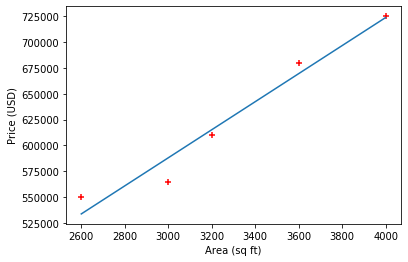

In [14]:
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (USD)')
plt.scatter(df['area'], df['price'], color='red', marker='+')
plt.plot(df['area'], model.predict(df[['area']]))